In [109]:
import os
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score

In [110]:
def load_titanic_train_preprocessed():
    train_preprocessed = pd.read_csv(os.path.join('data', 'train_preprocessed.csv'))
    train_preprocessed_features = train_preprocessed.drop('Survived', axis=1)
    train_preprocessed_label = train_preprocessed['Survived']
    return train_preprocessed_features, train_preprocessed_label

In [111]:
def load_titanic_train_test_preprocessed():
    train_test_preprocessed = pd.read_csv(os.path.join('data', 'train_test_preprocessed.csv'))
    train_test_preprocessed_features = train_test_preprocessed.drop('Survived', axis=1)
    train_test_preprocessed_label = train_test_preprocessed['Survived']
    return train_test_preprocessed_features, train_test_preprocessed_label

In [112]:
X_train, y_train = load_titanic_train_preprocessed()
X_test, y_test = load_titanic_train_test_preprocessed()

# Train the model

In [113]:
def create_report(model, X, y):
    final_predictions = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y, final_predictions)
    plt.show()
    print("The test score is ", accuracy_score(y, final_predictions))
    print("The precision score is ", precision_score(y, final_predictions))
    print("The recall score is ", recall_score(y, final_predictions))
    print("The f1 score is ", f1_score(y, final_predictions))
    print(classification_report(y, final_predictions))

In [114]:
def correct_wrong_predicted_sets(model, X, y):
    final_predictions = model.predict(X)
    df = X.copy()
    df["Survived"] = y
    df["Predicted_Survived"] = final_predictions
    return df[df['Survived'] == df['Predicted_Survived']], df[df['Survived'] != df['Predicted_Survived']]

## LogisticRegression

In [115]:
lr_model = LogisticRegression(max_iter=1000, penalty=None)
lr_model.fit(X_train, y_train)
print("The score of our model is ", lr_model.score(X_train, y_train))
cross_val_score(lr_model, X_train, y_train)

The score of our model is  0.8075842696629213


array([0.8041958 , 0.85314685, 0.82394366, 0.76056338, 0.78873239])

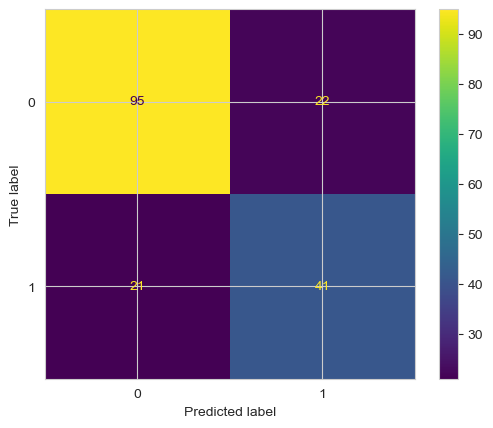

The test score is  0.7597765363128491
The precision score is  0.6507936507936508
The recall score is  0.6612903225806451
The f1 score is  0.656
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       117
           1       0.65      0.66      0.66        62

    accuracy                           0.76       179
   macro avg       0.73      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [116]:
create_report(lr_model, X_test, y_test)

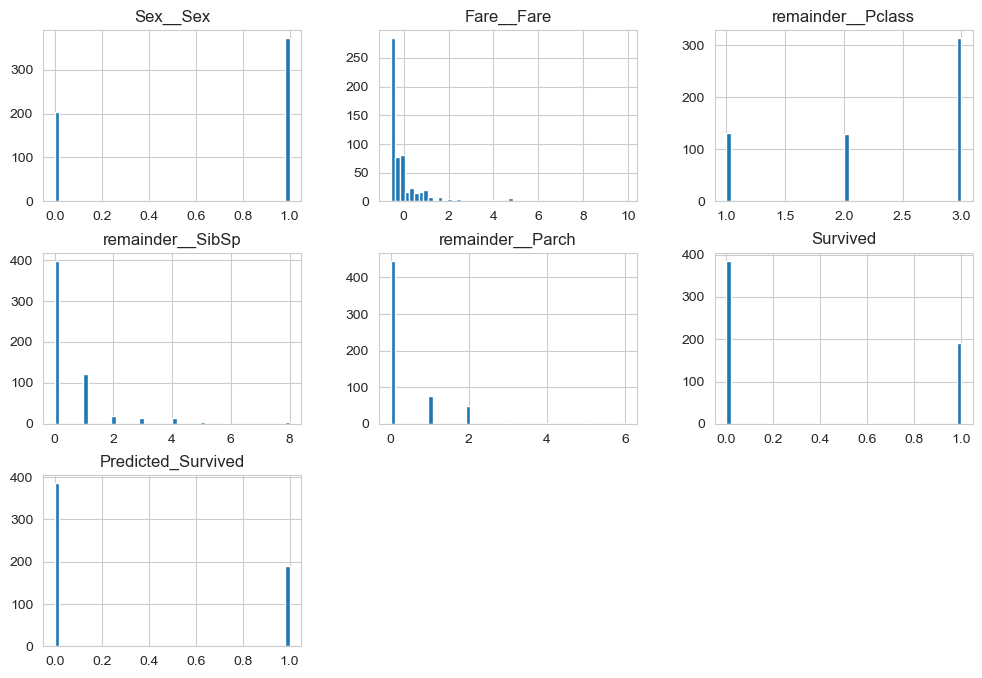

In [117]:
df_correct_predicted, df_wrong_predicted = correct_wrong_predicted_sets(lr_model, X_train, y_train)
df_correct_predicted.hist(bins=50, figsize=(12, 8))
plt.show()

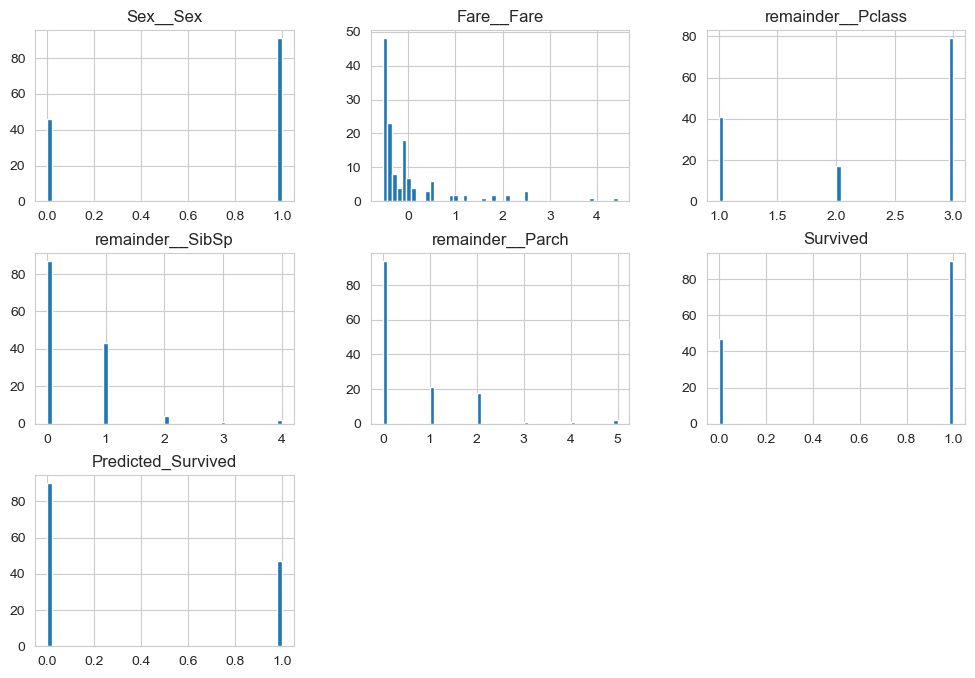

In [118]:
df_wrong_predicted.hist(bins=50, figsize=(12, 8))
plt.show()

## SGDClassifier

In [119]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
print("The score of our model is ", sgd_model.score(X_train, y_train))
cross_val_score(sgd_model, X_train, y_train)

The score of our model is  0.4747191011235955


array([0.72727273, 0.75524476, 0.83098592, 0.76760563, 0.79577465])

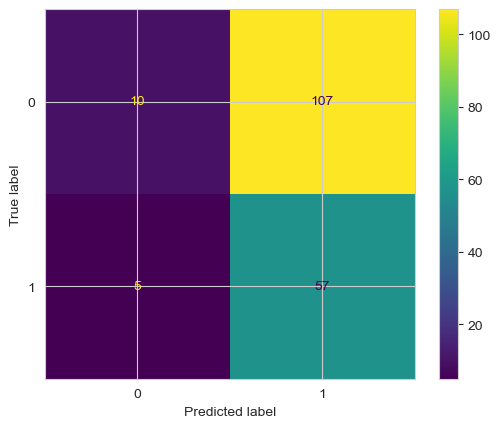

The test score is  0.3743016759776536
The precision score is  0.3475609756097561
The recall score is  0.9193548387096774
The f1 score is  0.504424778761062
              precision    recall  f1-score   support

           0       0.67      0.09      0.15       117
           1       0.35      0.92      0.50        62

    accuracy                           0.37       179
   macro avg       0.51      0.50      0.33       179
weighted avg       0.56      0.37      0.27       179



In [120]:
create_report(sgd_model, X_test, y_test)

## Decision Tree

In [121]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)
print("The score of our model is ", dt_model.score(X_train, y_train))
cross_val_score(dt_model, X_train, y_train)

The score of our model is  0.7921348314606742


array([0.7972028 , 0.83216783, 0.8028169 , 0.76056338, 0.76760563])

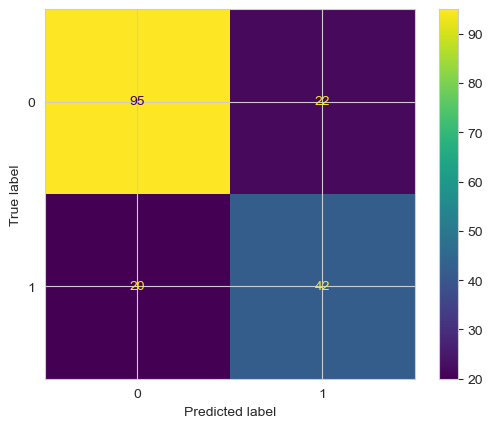

The test score is  0.7653631284916201
The precision score is  0.65625
The recall score is  0.6774193548387096
The f1 score is  0.6666666666666667
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       117
           1       0.66      0.68      0.67        62

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



In [122]:
create_report(dt_model, X_test, y_test)

## Random Forest Classifier

In [123]:
random_forest = RandomForestClassifier(class_weight="balanced")
random_forest.fit(X_train, y_train)
print("The score of our model is ", random_forest.score(X_train, y_train))
cross_val_score(random_forest, X_train, y_train)

array([0.81118881, 0.81818182, 0.88028169, 0.76760563, 0.77464789])

The score of our model is  0.9269662921348315


array([0.81818182, 0.81818182, 0.88028169, 0.77464789, 0.76760563])

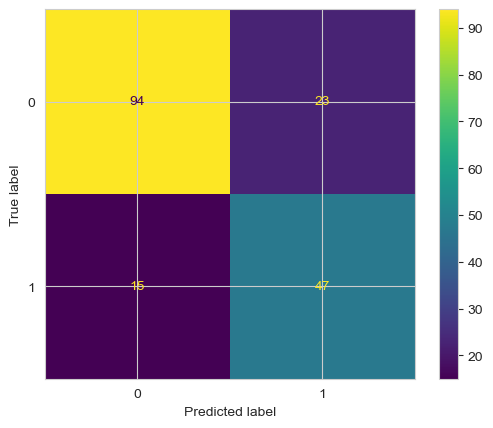

The test score is  0.7877094972067039
The precision score is  0.6714285714285714
The recall score is  0.7580645161290323
The f1 score is  0.7121212121212119
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       117
           1       0.67      0.76      0.71        62

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179



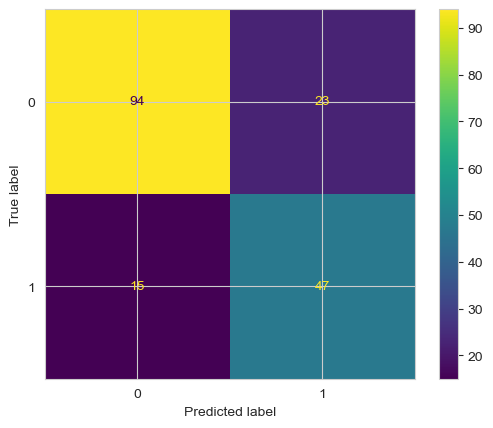

The test score is  0.7877094972067039
The precision score is  0.6714285714285714
The recall score is  0.7580645161290323
The f1 score is  0.7121212121212119
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       117
           1       0.67      0.76      0.71        62

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179



In [124]:
create_report(random_forest, X_test, y_test)

## SVM

In [125]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("The score of our model is ", svm_model.score(X_train, y_train))
cross_val_score(svm_model, X_train, y_train)

The score of our model is  0.8202247191011236


array([0.8041958 , 0.85314685, 0.81690141, 0.77464789, 0.78873239])

The score of our model is  0.8202247191011236


array([0.8041958 , 0.85314685, 0.81690141, 0.77464789, 0.78873239])

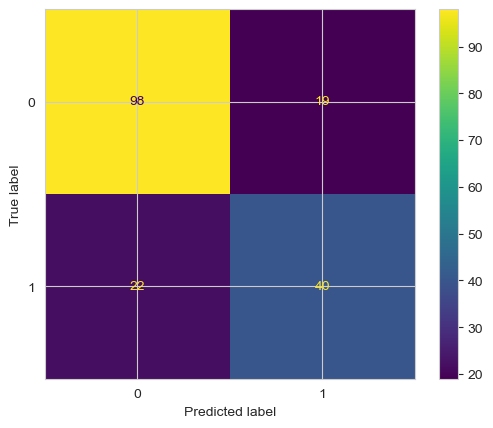

The test score is  0.770949720670391
The precision score is  0.6779661016949152
The recall score is  0.6451612903225806
The f1 score is  0.6611570247933884
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       117
           1       0.68      0.65      0.66        62

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



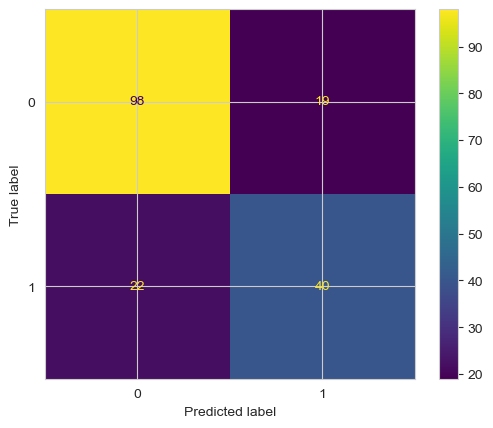

The test score is  0.770949720670391
The precision score is  0.6779661016949152
The recall score is  0.6451612903225806
The f1 score is  0.6611570247933884
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       117
           1       0.68      0.65      0.66        62

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



In [126]:
create_report(svm_model, X_test, y_test)

# Ensemble learning technique

## XGBoost

In [127]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
print("The score of our model is ", xgb_model.score(X_train, y_train))
cross_val_score(xgb_model, X_train, y_train)

The score of our model is  0.9129213483146067


array([0.81818182, 0.83216783, 0.85915493, 0.78873239, 0.78873239])

The score of our model is  0.9129213483146067


array([0.81818182, 0.83216783, 0.85915493, 0.78873239, 0.78873239])

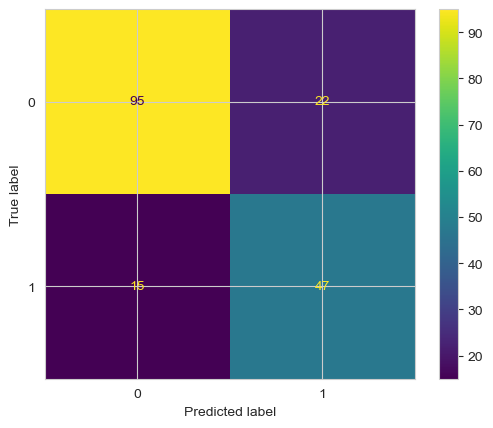

The test score is  0.7932960893854749
The precision score is  0.6811594202898551
The recall score is  0.7580645161290323
The f1 score is  0.7175572519083969
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       117
           1       0.68      0.76      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



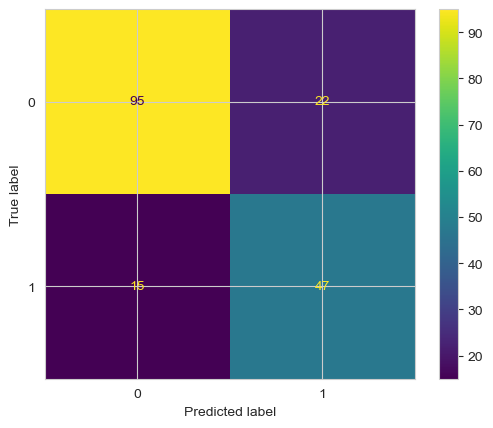

The test score is  0.7932960893854749
The precision score is  0.6811594202898551
The recall score is  0.7580645161290323
The f1 score is  0.7175572519083969
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       117
           1       0.68      0.76      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



In [128]:
create_report(xgb_model, X_test, y_test)

## Stacking

In [129]:
base_estimators = [
    ('lr', lr_model),
    ('sgd', sgd_model),
    ('dt', dt_model)
]

ensemble_model = StackingClassifier(estimators=base_estimators)
ensemble_model.fit(X_train, y_train)
print("The score of our model is ", ensemble_model.score(X_train, y_train))
cross_val_score(ensemble_model, X_train, y_train)

The score of our model is  0.7991573033707865


array([0.7972028 , 0.85314685, 0.82394366, 0.77464789, 0.78169014])

The score of our model is  0.7991573033707865


array([0.7972028 , 0.85314685, 0.82394366, 0.77464789, 0.78169014])

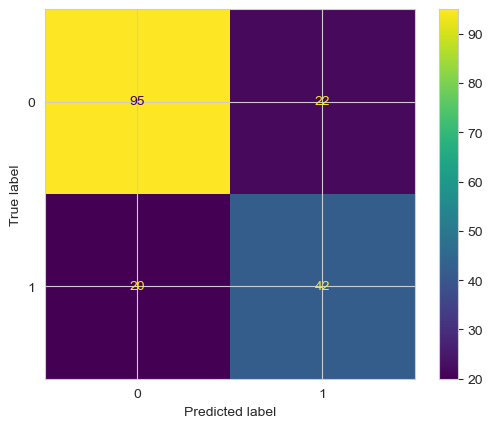

The test score is  0.7653631284916201
The precision score is  0.65625
The recall score is  0.6774193548387096
The f1 score is  0.6666666666666667
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       117
           1       0.66      0.68      0.67        62

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



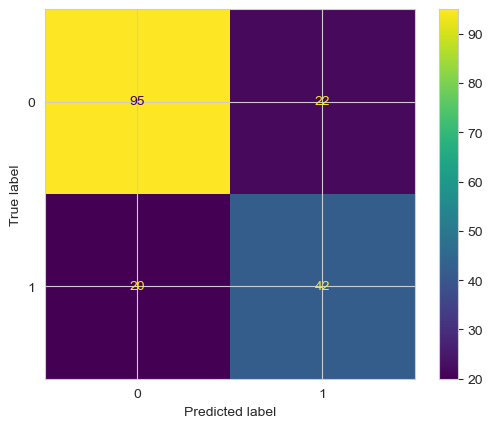

The test score is  0.7653631284916201
The precision score is  0.65625
The recall score is  0.6774193548387096
The f1 score is  0.6666666666666667
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       117
           1       0.66      0.68      0.67        62

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



In [130]:
create_report(ensemble_model, X_test, y_test)

## Bagging

In [131]:
bagging_classifier = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
bagging_classifier.fit(X_train, y_train)
print("The score of our model is ", bagging_classifier.score(X_train, y_train))
cross_val_score(bagging_classifier, X_train, y_train)

The score of our model is  0.8146067415730337


array([0.8041958 , 0.84615385, 0.80985915, 0.78169014, 0.78873239])

The score of our model is  0.8146067415730337


array([0.8041958 , 0.84615385, 0.80985915, 0.78169014, 0.78873239])

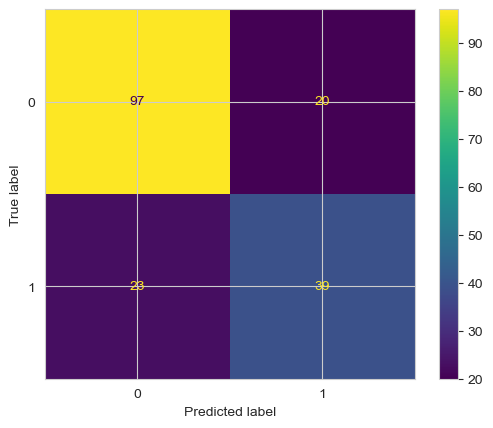

The test score is  0.7597765363128491
The precision score is  0.6610169491525424
The recall score is  0.6290322580645161
The f1 score is  0.6446280991735538
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       117
           1       0.66      0.63      0.64        62

    accuracy                           0.76       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179



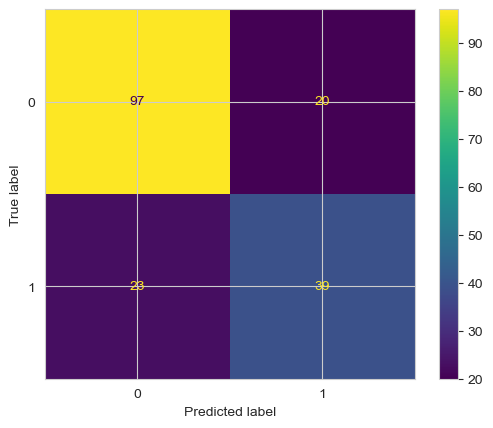

The test score is  0.7597765363128491
The precision score is  0.6610169491525424
The recall score is  0.6290322580645161
The f1 score is  0.6446280991735538
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       117
           1       0.66      0.63      0.64        62

    accuracy                           0.76       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179



In [132]:
create_report(bagging_classifier, X_test, y_test)

# Create result for Kaggle

In [133]:
def load_titanic_test_preprocessed():
    test_preprocessed = pd.read_csv(os.path.join('data', 'test_preprocessed.csv'))
    test_preprocessed_features = test_preprocessed.drop('PassengerId', axis=1)
    test_preprocessed_label = test_preprocessed['PassengerId']
    return test_preprocessed_features, test_preprocessed_label

X_final, x_final_passenger_id = load_titanic_test_preprocessed()

y_final = xgb_model.predict(X_final)

df_final = pd.DataFrame(x_final_passenger_id)
df_final["Survived"] = y_final

filepath = Path('result.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_final.to_csv(filepath, index=False)